In [2]:
import numpy as np

# Introduction to Qiskit

In this introduction, we will cover the following topics:
1. Quantum gates and quantum circuits
2. Visualization with the Bloch sphere and the state vector (amplitude bar)
3. Circuit execution on a local simulator
4. Displaying and plotting results
5. Circuit execution on IBM Quantum Experience

## Quantum gates and quantum circuits

1. Quantum gates
2. Quantum circuits
3. Measurements
4. Parametrized circuits

### Quantum gates


The state of a qubit is described by a complex vector, 

$\begin{equation}|\psi\rangle = \begin{bmatrix}\alpha\ \\ \beta \end{bmatrix}\end{equation}$

such that $|\alpha|^2 + |\beta|^2 = 1$. Using Dirac's notation, we have $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

A quantum gate is a unitary transformation described by a complex matrix.<br>
For a quantum gate acting on a single qubit,

$\begin{equation}U = \begin{bmatrix}u_{00} & u_{01} \\ u_{10} & u_{11}\end{bmatrix}\end{equation}$ 

and $U^\dagger U = 1$.

When any $U$ can be expressed as a sequence of gates taken from a finite set of gates, we say that this set of quantum gates is universal. 

### Quantum circuits


A [quantum circuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) is a sequence of quantum gates applied on one or more qubits. It is made of at least one __quantum register__ and can contain one or many __classical register(s)__.

 * A quantum register is a collection of qubits. We will usually use a single quantum register.

 * A classical register is a collection of bits that stores the result of a measurement. When measuring a qubit, you can specify in which bit you want to store the measurement outcome -- or rely on the default assignation!

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ClassicalRegister, QuantumRegister

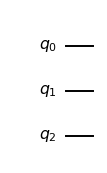

In [4]:
# A quantum circuit with 3 qubits (in a default quantum register), no classical bit
qc_3 = QuantumCircuit(3)
qc_3.draw('mpl', scale=0.7, style="clifford")

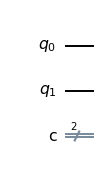

In [5]:
# A quantum circuit with 2 qubits, 2 classical bits
qc_2_2 = QuantumCircuit(2, 2)
qc_2_2.draw('mpl', scale=0.7, style="clifford")

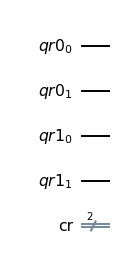

In [6]:
# A quantum circuit with 2 registers of 2 qubits each,
# and one classical register with 2 classical bits
qr0 = QuantumRegister(2, 'qr0')
qr1 = QuantumRegister(2, 'qr1')
cr = ClassicalRegister(2, 'cr')

qc_22_2 = QuantumCircuit(qr0, qr1, cr)
qc_22_2.draw('mpl', scale=0.7, style="clifford")

## Gates are applied from left to right.

All the gates defined by Qiskit have a corresponding method in the `QuantumCircuit` class.<br>
Let's look at a few examples.

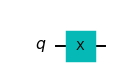

In [7]:
# The NOT gate
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl', scale=0.7, style="clifford")

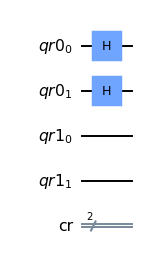

In [8]:
# The Hadamard gate
qr0 = QuantumRegister(2, "qr0")
qr1 = QuantumRegister(2, "qr1")
cr = ClassicalRegister(2, "cr")

qc = QuantumCircuit(qr0,qr1,cr)

qc.h(qr0)

qc.draw("mpl", scale=0.7, style="clifford")

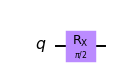

In [9]:
# The RX gate, which applies a rotation around the X-axis by a given angle
qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)  # rotation of PI/2
qc.draw('mpl', scale=0.7, style="clifford")

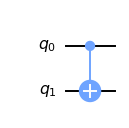

In [10]:
# The CNOT gate
qc = QuantumCircuit(2)
qc.cx(0, 1)  # first arg is control qubit, second is target qubit
qc.draw('mpl', scale=0.7, style="clifford")

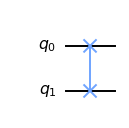

In [11]:
# The SWAP gate
qc = QuantumCircuit(2)
qc.swap(0, 1)  # first arg is control qubit, second is target qubit
qc.draw('mpl', scale=0.7, style="clifford")

**For more detail and information about Quantum Gate [Standard gates](https://docs.quantum.ibm.com/api/qiskit/circuit_library#standard-gates)**

## Visualization: Statevector 
In quantum computing, one can visualize a quantum state represented by its state vector to observe the amplitudes and their respective phase within the system.

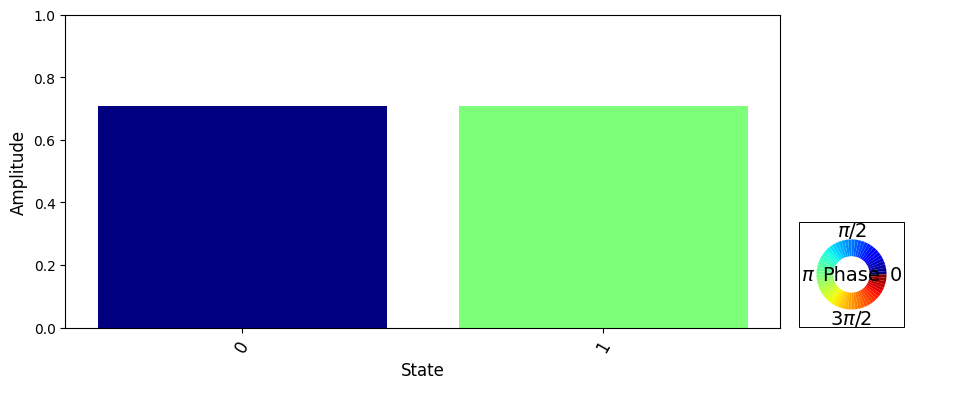

In [14]:
# import our method to visualize the state vector `plot_statevector``
import sys
sys.path.append('..')
from statevector_visualizer import plot_statevector
from qiskit.quantum_info import Statevector

# Create your quantum circuit
qc_sv = QuantumCircuit(1)
qc_sv.x(0)  # X gate applyed on |0> give |1>
qc_sv.h(0)  # H gate applyed on |1> give  1/sqrt(2)|0> - 1/sqrt(2)|1>

# Get the statevector of the circuit
state = Statevector(qc_sv)

# Plot the amplitude graph 
plot_statevector(state)

# the plot will show the final state 1/sqrt(2)|0> - 1/sqrt(2)|1>
# 1/sqrt(2) = 0.707...
# in the 0 state, a bar with blue color (postive amplitude)
# ine the 1 state, a bar with green color (rotation pi) to represnte the -1 factor

## Measurements


A measurement is a non-unitary operation that reads the state of the qubits.

Born's rule tells us that for a qubit in state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$, the probability that the measurement's outcome is 0 is $|\alpha|^2$, and we have $|\beta|^2$ for the probability that we measure 1.

As mentioned before, the measurement outcome is stored in a classical bit.

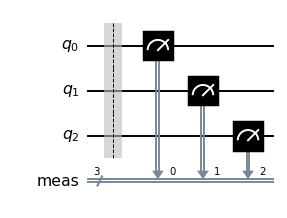

In [15]:
qc_3 = QuantumCircuit(3)

# Measure all qubits and create a classical register with 1:1 mapping between
# qubits number and classical bit number
qc_3.measure_all()

qc_3.draw('mpl', scale=0.7, style="clifford")

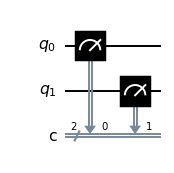

In [16]:
qc_2_2 = QuantumCircuit(2, 2)

# Measure the qubits and store the outcome in the classical bits of an existing
# classical register
qc_2_2.measure(0, 0) # qubit 0 ==> classical bit 0
qc_2_2.measure(1, 1) # qubit 1 ==> classical bit 1
qc_2_2.draw('mpl', scale=0.7, style="clifford")

# you can change this for example qubit 0 store result in bit 1 ...

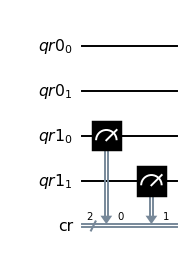

In [17]:
# A quantum circuit with 2 registers of 2 qubits each,
# and one classical register with 2 classical bits
qr0 = QuantumRegister(2, 'qr0')
qr1 = QuantumRegister(2, 'qr1')
cr = ClassicalRegister(2, 'cr')

qc_22_2 = QuantumCircuit(qr0, qr1, cr)

# Measure the qubits of one quantum register and save the result in the classical bits
# of an existing classical register
qc_22_2.measure(qr1, cr)
qc_22_2.draw('mpl', scale=0.7, style="clifford")

## Parametrized circuits


1. `Parameter` and `ParameterVector`
2. Parameters binding

The vast majority of algorithms that run on today's quantum computers are _variational algorithms_.

A variational algorithm is a hybrid algorithm where:
 1. The quantum circuits have parametrized gates and are used to compute the expectation value of some observable.
 2. A classical computer updates the parameters of the quantum circuits in order to minimize a cost function. 


`Parameter` vs `ParameterVector`:
- `Parameter`: We generally use it when we have only one parameter. However, we can also use it manually to create a list of parameters.
- `ParameterVector`: This is a predefined class used to handle multiple parameters.

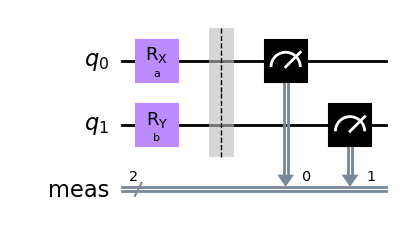

In [18]:
from qiskit.circuit import Parameter

qc_var = QuantumCircuit(2)

# define Parameters 
alpha = Parameter('a')
beta =  Parameter('b')

qc_var.rx(alpha, 0)
qc_var.ry(beta, 1)

qc_var.measure_all()

qc_var.draw('mpl', style="clifford")

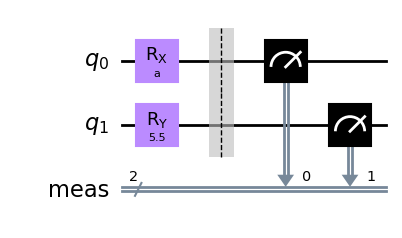

In [19]:
# Bind the parameters (assign values to them) to create a bound circuit.
qc_var_binded = qc_var.assign_parameters({alpha: 3})
qc_var_binded = qc_var.assign_parameters({beta: 5.5})

qc_var_binded.draw('mpl', style="clifford")

Use `ParameterVector`:

p, ['p[0]', 'p[1]']


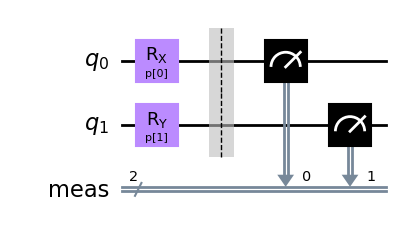

In [20]:
from qiskit.circuit import ParameterVector

qc_var_2 = QuantumCircuit(2)

# define list of Parameters using ParameterVector
list_params = ParameterVector('p',2) 
print(list_params)

qc_var_2.rx(list_params[0], 0)
qc_var_2.ry(list_params[1], 1)

qc_var_2.measure_all()

qc_var_2.draw('mpl', style="clifford")

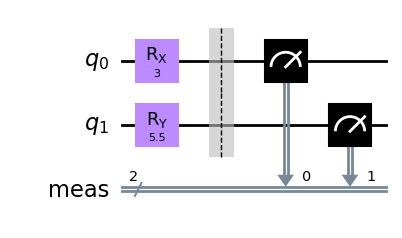

In [21]:
# Create a dictionary to simplify the process of assigning the values.

params_dict = {list_params[0]:3, list_params[1]:5.5}

# qc_binded = qc_var.bind_parameters(params_dict) #deprecate
qc_var_2_binded = qc_var_2.assign_parameters(params_dict)
qc_var_2_binded.draw('mpl', style="clifford")

## Circuit execution (on a local simulator)

1. First backend : Aer Simulator
   1. First approach : `transpile` function
   2. Second approach : `Sampler` class

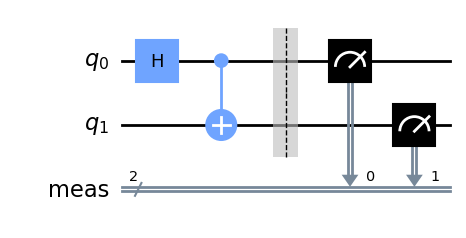

In [22]:
# The quantum circuit that we will execute
qc_bell1 = QuantumCircuit(2)
qc_bell1.h(0)
qc_bell1.cx(0, 1)
qc_bell1.measure_all()

qc_bell1.draw('mpl', style="clifford")

### First backend : Aer Simulator


[`Aer`](https://docs.quantum.ibm.com/api/qiskit/0.39/aer) provides quantum computing simulators with realistic noise models.<br>
When you use a simulator through the `qiskit_aer` module, the computation runs locally. 

In [23]:
from qiskit_aer import AerSimulator

In [24]:
simulator = AerSimulator()

### First approach : `transpile` function

Transpilation is the process of rewriting a given input circuit to match the topology of a specific quantum device, and/or to optimize the circuit for execution on present day noisy quantum systems, [more detail here](https://docs.quantum.ibm.com/api/qiskit/transpiler)

This method (and its 33 parameters!) is documented [here](https://docs.quantum.ibm.com/api/qiskit/0.24/qiskit.compiler.transpile)

It will be the default circuit execution approach during this event.

Two parameters are mandatory:
 1. the circuit(s)
 2. the backend (quantum computer or simulator)

The `transpile` method performs the computation asynchronously. It returns a `Job` instance.
Retrieving the result from the job is blocking.

In [25]:
# from qiskit import execute #deprecated in qiskit 1.0
from qiskit import transpile

In [26]:
new_circuit = transpile(qc_bell1, simulator)
job = simulator.run(new_circuit)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 497, '00': 527}


### counts:
The counts represent the measurement outcomes obtained from running a quantum circuit on a simulator or a real quantum device. It represent the histogram of measurement outcomes.
- Each key in the counts dictionary corresponds to a specific measurement outcome (e.g., ‘00’, ‘01’, ‘10’, ‘11’, etc.).
- The corresponding value is the number of times that outcome was observed during the execution of the circuit.
- For example, if you see '00': 500, it means that the state ‘00’ was measured 500 times.

The counts provide insights into the probabilities of different measurement outcomes.

### Second approach : `Sampler`

In [29]:
#Alternative with Sampler
from qiskit.primitives import BackendSampler 
#from qiskit.primitives import SamplerV2

sampler = BackendSampler(simulator)
job = sampler.run(qc_bell1)
result = job.result()

# this class return the quasi-probability distributions associated with the measurement outcomes.
print('default output: ', result.quasi_dists[0])
print('Binary output: ', result.quasi_dists[0].binary_probabilities())

TypeError: BackendSamplerV2.__init__() takes 1 positional argument but 2 were given

### quasi-probability distributions -> counts
We can convert the quasi-distribution probabilities to counts if needed (based on the number of shots) as follows:

In [30]:
num_shots = result.metadata[0]['shots']
counts = {k: v*num_shots for k, v in result.quasi_dists[0].binary_probabilities().items()}
print(counts)

{'00': 538.0, '11': 486.0}


### Display the results as a histogram.

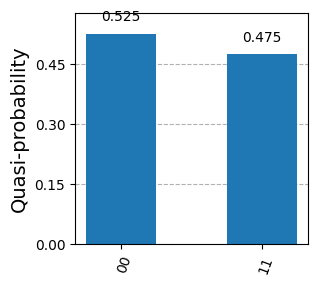

In [31]:
from qiskit.visualization import plot_histogram

plot_histogram(counts, figsize=(3, 3))

#### Second class : `Sampler`



The `Sampler` class calculates (quasi) probabilities of bitstrings from quantum circuits.

In [32]:
from qiskit.primitives import Sampler, BackendSampler

In [33]:
# Exact
sampler = Sampler()
job = sampler.run(circuits=[qc_bell1])
print(f'Sampling distribution: {job.result().quasi_dists[0]}')

Sampling distribution: {0: 0.5, 3: 0.5}


/var/folders/cn/8wc0t1212qv5q9y694bk0w6r0000gq/T/ipykernel_19407/1001395544.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


## Execute a paramtrized circuit with diffirent values

In [34]:
job = sampler.run([qc_var_2, qc_var_2], parameter_values=[[0,0], [1,1]])
result = job.result()
print(result.quasi_dists)

# The line job = sampler.run([qc_var_2, qc_var_2], parameter_values=[[0, 0], [1, 1]]) creates a job by running two instances of the quantum circuit qc_var_2.
# The parameter_values argument specifies the parameter values for each circuit. In this case, the first circuit uses [0, 0] as its parameters, and the second circuit uses [1, 1].

[{0: 1.0}, {0: 0.593132798365677, 1: 0.177018354568393, 2: 0.177018354568393, 3: 0.052830492497537}]
